<Body>   
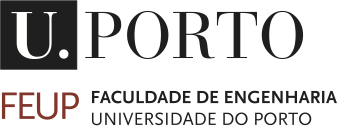   
<h1> <b>Machine Learning 2021/2022 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt),
**Aníbal Matos** (anibal@fe.up.pt),
**Armando Sousa** (asousa@fe.up.pt),
**Andry Pinto** (amgp@fe.up.pt)

FEUP, Apr. 2022

---


# **Project #01**

**Note:** This is to be done in group of **2** elements. Use this notebook to answer all the questions. At the end of the work, you should **upload** the **notebook** and a **pdf file** with a printout of the notebook with all the results in the **moodle** platform. 

**Deadlines:** Present you work (and answer questions) on the week of **April 18** in your corresponding practical class. Upload the files until 23:59 of **April 28, 2022**.


---



# **Identification**

* **Group:** xx
* **Name:** xxx
* **Student Number:**

* **Name:**
* **Student Number:**


---




**Initial setup:** To download the file **data-set.cvs**, run the next cell.

In [1]:
!wget -O dataset.csv.zip https://www.dropbox.com/s/9y0s2ogjovkwrbm/data-set.csv.zip?dl=0 --quiet
!unzip dataset.csv.zip -d. 


Archive:  dataset.csv.zip
  inflating: ./data-set.csv          
  inflating: ./__MACOSX/._data-set.csv  


In [2]:
# Then, run this code to get the data-set

import pandas as pd
df = pd.read_csv('data-set.csv', index_col=0)
df.head()
#df

# By convention, values of zero mean no measurements.
# The units are:
# [m] for x and y
# [m/s] for the velocities vx and vy
# [m] for the LIDAR ranges

,time,x,y,vx,vy,angle -179,angle -178,angle -177,angle -176,angle -175,...,angle 171,angle 172,angle 173,angle 174,angle 175,angle 176,angle 177,angle 178,angle 179,angle 180
0,0.0,-3.946339,-2.912177,0.711051,-0.307325,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.1,0.000000,0.000000,0.678366,-0.308563,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.2,0.000000,0.000000,0.677682,-0.285029,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.3,0.000000,0.000000,0.648523,-0.293170,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.4,0.000000,0.000000,0.644965,-0.277222,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Part 1: Kalman filter design**



Consider a holonomic mobile robot in the 2D plan and suppose that one can get measurements from its linear velocity every time step $t=0, 0.1, 0.2, \ldots$ (in seconds) and its position every time step $t=0, 0.5, 1.0, 1.5 \ldots$ (in seconds). Suppose also that the measurements are corrupted by additive Gaussian noise and furthermore, the linear velocity measurements may also include a unknown but constant bias term. The goal is to obtain an estimate of the position of the robot together with a measure of its uncertainty. To this end, we will implement a Kalman filter (KF)!
 
### **Model:**
Let $(x_t, y_t)$ be the position of the robot at time step $t$, and $(v_{x,t}, v_{y,t})$ its linear velocity. Let $(b_{x,t}, b_{y,t})$ be the bias term and $w_t$ and $\eta_t$ Gaussian noises. Then, a state-space model to design the KF can be written as


*x-direction*
\begin{align*}
\begin{bmatrix}
x_{t+1} \\
b_{x,t+1}
\end{bmatrix}
&= \begin{bmatrix}
1 &h \\
0 &1
\end{bmatrix}
\begin{bmatrix}
x_{t} \\
b_{x,t}
\end{bmatrix}
+\begin{bmatrix}
h \\
0
\end{bmatrix}
v_{x,t}
+ w_{x,t} \quad t=0, 0.1, 0.2, \ldots \\
z_{x,t+1} &= 
\begin{bmatrix}
1 & 0
\end{bmatrix}
\begin{bmatrix}
x_{t} \\
b_{x,t}
\end{bmatrix} +  \eta_{x,t}, \quad t=0, 0.5, 1.0, 1.5 \ldots
\end{align*}

*y-direction*
\begin{align*}
\begin{bmatrix}
y_{t+1} \\
b_{y,t+1}
\end{bmatrix}
&= \begin{bmatrix}
1 &h \\
0 &1
\end{bmatrix}
\begin{bmatrix}
y_{t} \\
b_{y,t}
\end{bmatrix}
+\begin{bmatrix}
h \\
0
\end{bmatrix}
v_{y,t}
+ w_{y,t} \quad t=0, 0.1, 0.2, \ldots \\
z_{y,t+1} &= 
\begin{bmatrix}
1 & 0
\end{bmatrix}
\begin{bmatrix}
y_{t} \\
b_{y,t}
\end{bmatrix} +  \eta_{y,t}, \quad t=0, 0.5, 1.0, 1.5 \ldots
\end{align*}
where $(z_{x,t}, z_{y,t})$ is the output vector and $h=0.1\,s$ is the sample time.

**Note:** We have decomposed the model in two decoupled parts (x and y directions). Thus, it is possible to design a KF for each direction.

**1.1** 
Implement 2 KFs (one for each direction) and display the evolution along time of the estimated position of the robot and the estimated bias term. Display also the estimated trajectory 2D.

In [3]:
import numpy as np
from numpy import * 
import matplotlib.pyplot as plt
import random
random.seed(3)

time = df["time"].values
x = df["x"].values
y = df["y"].values
vx = df["vx"].values
vy = df["vy"].values



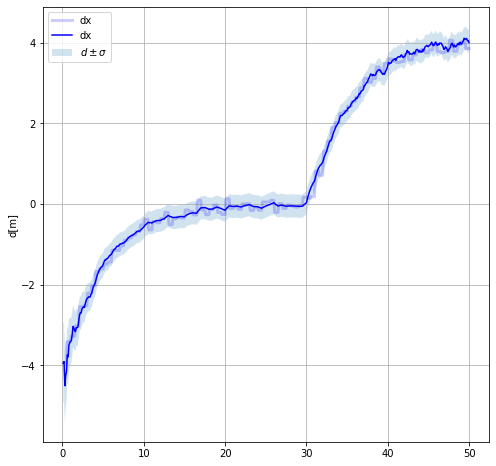

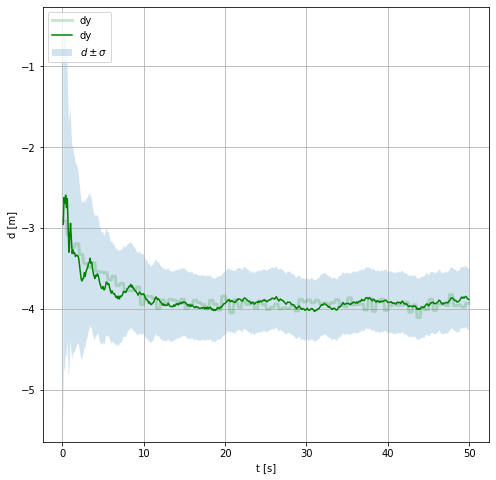

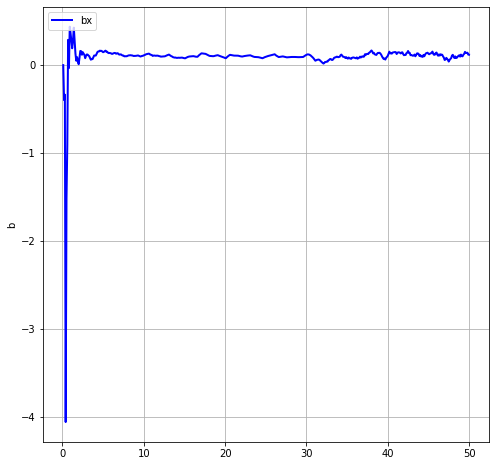

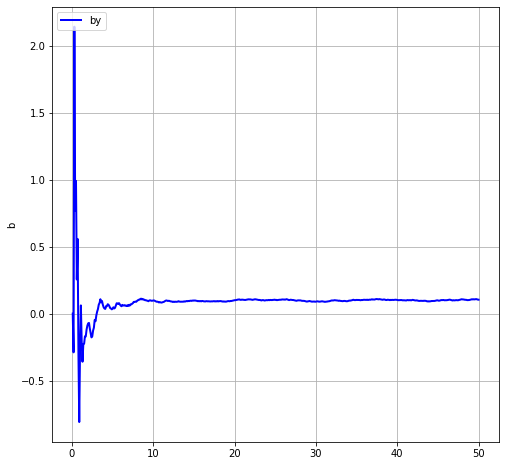

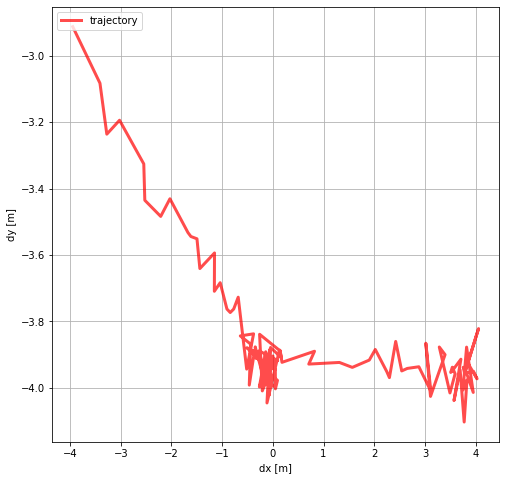

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import dot 
from numpy import * 
from numpy.linalg import inv 
from numpy.linalg import det
import random

def kf_predict(X, P, A, Q, B, U): 
    """      
      X : The mean state estimate of the previous step (k−1) - shape(m,1) 
      P : The state covariance of previous step (k−1) - shape(m,m) 
      A : The transition  matrix - shape(m,m) 
      Q : The process noise covariance matrix - shape(m,m) 
      B : The input effect matrix - shape(p, m) 
      U : The control input - shape(q,1)
    """ 
    X = A @ X + B @ U
    P = A @ P @ A.T + Q 
    return(X,P) 

def kf_update(X, P, Y, H, R): 
    """      
      K  : the Kalman Gain matrix 
      IS : the Covariance or predictive mean of Y  
    """
    IS = H @ P @ H.T + R  
    K = P @ H.T @ inv(IS) 
    X = X + K @ (Y- H @ X) 
    P = P - K @ IS @ K.T 
#    P = P - K @ H @ P 
    return (X,P) 


PI = np.pi

#Inter sample time
dt = 0.1; 

# ini state
X = np.array( [ [0.0] , [0.0] ]  ) 

#Y array with 2 itens cos 2D
Y =  np.array( [ [0.0] , [0.0] ] )
 
# ini Covar , por ser 2d tenho que ter 2 vetores
P1 = np.array( [ [ 999.0, 0.0 ] ,
                [ 0.0, 999.0 ] ]  ) 

P2 = np.array( [ [ 999.0, 0.0 ] ,
                [ 0.0, 999.0 ] ]  ) 

# state matrix igual note5
A = np.array( [ [ 1.0, dt ] ,
                [ 0.0, 1.0  ] ] )       
  
# input effect matrix
B = np.array( [ [dt], [0] ] )  

# meas matrix
H = np.array( [ [ 1.0, 0.0 ] ] )  

# meas noise 
Rx = np.array([ [1] ] ) 
Ry = np.array([ [4] ] ) 

# process noise
Qx = np.array(np.eye(2) * 0.001 )
Qy = np.array(np.eye(2) * 0.00005 ) 

# meas
Zx = np.array([ [0.1] ])
Zy = np.array([ [0.1] ])


#
# Kalman Filter loop
#

#for pretty plotting igual ao note 5 mas para 2 dimensoes 
t=0
t_time = []      
dx_time= []      # position of train over time (mean)
bx_time = []      # velocity of train over time (mean)
dx_sd_time= []   # position of train over time (std_dev)
bx_sd_time = []   # velocity of train over time (std_dev)
dx_up_time = []   # d mean + one std_dev
dx_dn_time = []   # d mean - one std_dev
bx_up_time = []   # v mean + one std_dev
bx_dn_time = []   # v mean - one std_dev

dx = 0   # real train position train_d = dx
vxm = 0   # real train velocity train_v = vxm
bx = 0 #TEST
train_d_time_x = []   # real train position traind
train_v_time_x = []   # real train velocity
train_b_time_x = [] #TEST

dy_time= []      # position of train over time (mean)
by_time = []      # velocity of train over time (mean)
dy_sd_time= []   # position of train over time (std_dev)
by_sd_time = []   # velocity of train over time (std_dev)
dy_up_time = []   # d mean + one std_dev
dy_dn_time = []   # d mean - one std_dev
by_up_time = []   # v mean + one std_dev
by_dn_time = []   # v mean - one std_dev

dy = 0   # real train position train_d = dx
vym = 0    # real train velocity train_v = vxm
by = 0
train_d_time_y = []   # real train position traind
train_v_time_y = []   # real train velocity
train_b_time_y = []

N_iter = len(time)    # implies dt*N_iter seconds


for i in arange(0, N_iter):
  t += dt

  if (i%5 == 0 or i == 0):
    dx = x[i]
    dy = y[i]

   
  vxm = vx[i]
  vym = vy[i]  

  Rx = np.array([ [1] ] )
  Ry = np.array([ [6] ])
  Ux = np.array([ [vxm] ])
  Uy = np.array([ [vym]] )

 
  bx = X[1]
  #print(X)
  by = Y[1]
    #train_v += train_a * h     # real train velocity

  train_d_time_x.append(dx)     # real train position
  train_v_time_x.append(vxm)     # real train velocity
  train_b_time_x.append(bx)

  train_d_time_y.append(dy)     # real train position
  train_v_time_y.append(vym)     # real train velocity
  #train_a_time.append(train_a)     # real train acceleration
  train_b_time_y.append(by)

  Zx = np.array([ [dx * random.randrange(80, 120)/100 ] ]) # measurements are real +/- 20%
  Zy = np.array([ [dy * random.randrange(80, 120)/100 ] ]) # measurements are real +/- 20%
  #print(X)

  (X, P1) = kf_predict(X, P1, A, Qx, B, Ux)
  (Y,P2) =  kf_predict(Y, P2, A, Qy, B, Uy)

  (X, P1) = kf_update(X, P1, Zx, H, Rx)
  (Y, P2) = kf_update(Y, P2, Zy, H, Ry)

  #print(Px)
  
  
  #print(X[0])
  #print(Zx)
  t_time.append(t)
  dx_time.append( X[0].item() )
  bx_time.append( B[0].item() )
  dx_sd_time.append( sqrt( P1[0][0]).item() )
  bx_sd_time.append( sqrt( P1[1][1]).item() )
  dx_up_time.append( X[0].item() + sqrt( P1[0][0]).item() )
  dx_dn_time.append( X[0].item() - sqrt( P1[0][0]).item() )
  bx_up_time.append( X[1].item() + sqrt( P1[1][1]).item() )
  bx_dn_time.append( X[1].item() - sqrt( P1[1][1]).item() )

  dy_time.append( Y[0].item() )
  by_time.append( Y[1].item() )
  dy_sd_time.append( sqrt( P2[0][0]).item() )
  by_sd_time.append( sqrt( P2[1][1]).item() )
  dy_up_time.append( Y[0].item() + sqrt( P2[0][0]).item() )
  dy_dn_time.append( Y[0].item() - sqrt( P2[0][0]).item() )
  by_up_time.append( Y[1].item() + sqrt( P2[1][1]).item() )
  by_dn_time.append( Y[1].item() - sqrt( P2[1][1]).item() )



# dx
fig = plt.figure(figsize=(8,8))
chart1 = fig.add_subplot(111)
chart1.plot(t_time, train_d_time_x, label='dx', c="b", linewidth=3, alpha=0.2)
chart1.plot(t_time,dx_time, label='dx', c="b")
chart1.fill_between(t_time, dx_dn_time, dx_up_time, alpha=0.2, linewidth=0, label='$d\pm\sigma$')
plt.legend(loc='upper left')
chart1.set_ylabel('d[m]')
plt.grid()

#dy
fig = plt.figure(figsize=(8,8))
chart2 = fig.add_subplot(111)
chart2.plot(t_time, train_d_time_y, label='dy', c="g", linewidth=3, alpha=0.2)
chart2.plot(t_time,dy_time, label='dy', c="g")
chart2.fill_between(t_time,dy_dn_time,dy_up_time, alpha=0.2, label='$d\pm\sigma$')
chart2.set_ylabel('d [m]')
chart2.set_xlabel('t [s]')
plt.legend(loc='upper left')
plt.grid()
plt.show()

# bx
fig = plt.figure(figsize=(8,8))
chart1 = fig.add_subplot(111)
chart1.plot(t_time, train_b_time_x, label='bx', c="b", linewidth=2, alpha=1)
plt.legend(loc='upper left')
chart1.set_ylabel('b')
plt.grid()

# by
fig = plt.figure(figsize=(8,8))
chart1 = fig.add_subplot(111)
chart1.plot(t_time, train_b_time_y, label='by', c="b", linewidth=2, alpha=1)
plt.legend(loc='upper left')
chart1.set_ylabel('b')
plt.grid()

#2D trajectory
fig = plt.figure(figsize=(8,8))
chart3 = fig.add_subplot(111)
chart3.plot(train_d_time_x, train_d_time_y, label='trajectory', c="r", linewidth=3, alpha=0.7)
chart3.set_ylabel('dy [m]')
chart3.set_xlabel('dx [m]')
plt.legend(loc='upper left')
plt.grid()
plt.show()
  
  
 
# End For Loop


# **Part 2: Linear Regression**



In this part, the aim is to build a map of the environment by combining the position of the robot with the measurements of the 2D **LIDAR** that is on-board of the robot. The LIDAR measurements consist of range (distance) from the robot to a possible obstacle for each degree of direction, that is, 
$$
r_t = \{r_\beta + \eta_r : \beta=-179^o, -178^o, \ldots, 0^o, \ldots, 180^o\}
$$
where $\eta_r$ is assumed to be Gaussian noise. The sample time is the same, that is, $h=0.1\,s$, but the LIDAR measurements are outputted every time step $t=0,0.5,1.0, 1.5, \ldots$ (in seconds) like the robot position in the previous exercise. Moreover, if there is no obstacle within the direction of the laser range or if it is far away, that is, if the distance is greater than $5\,m$, by convention the range measurement is set to zero. It may also happen that the LIDAR in some cases may output an *outlier*.

The next figure shows $r_t$ as a function of the angle $\beta$ for $t=5.0\,s$.

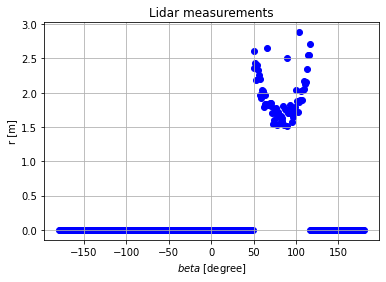

In [5]:

time = df["time"].values
Lidar_range = df.iloc[:, np.arange(5,365,1)].values

t=5*10 # t = 5 sec * 1/sample_time
angle = np.linspace(-179, 180, num=360)

plt.figure()
plt.scatter(angle, Lidar_range[t], color='b')
plt.title('Lidar measurements')
plt.ylabel('r [m]')
plt.xlabel('$beta$ [degree]')
plt.grid();



**2.1**
Using the estimated position of the robot (computed in the previous exercise) and the LIDAR data, 
1. Obtain the cloud points in the 2D plan that the robot sense at **$t=5\,s$** and plot them. Do not forget to remove the zero ranges and note that  

$$
\begin{align*}
\hat x_{o,t} = \hat x_t + r_t \cos\beta \\
\hat y_{o,t} = \hat y_t + r_t \sin\beta
\end{align*}
$$

2. Perform a linear regression for the previous data using a model of the type
\begin{equation} \color{green} { y_n = \theta_0 + \theta_1 x_n } 
 \end{equation}
and display the results, that is, display the resulting 2d map, the mean square error, and the optimal parameters for $\color{green} \theta$. To this end, apply the related Least Square (LS) normal equations and **only use** the sklearn to confirm the obtained values.



In [6]:
# Part 2.1.1

#To complete

#Build the cloud points in 2D plan
# x_o, y_o = [], []

# t=5*10 # t = 5 sec * 1/sample_time

# for i in range(len(Lidar_range[t])):
#   if Lidar_range[t][i] > 0:
#     x_o.append(...)
#     y_o.append(...)


In [7]:
# Part 2.1.2

#To complete


**2.2**
Do the same as the previous exercise but now with a polynomial model of the type
\begin{equation} \color{green} { y_n = \theta_0 + \theta_1 x_n + \theta_2 x^2_n } 
 \end{equation}



In [8]:
# To complete


**2.3**
At this point you can use sklearn! 
Do the same as the previous exercise (polynomial model) but now with **degree 10**. Moreover, implement also a regression with **Ridge** regularization and a regression with **LASSO** regularization. Do not forget to display the obtained results. What can you conclude?




In [9]:
# To complete


**2.4**
We now would like to use all the LIDAR data. One simple option (off-line) is to make a data set with all the cloud point positions in 2D and apply the linear regression techniques.

Using sklearn, do this for LS, LS+Ridge, LS+LASSO using the polynomial model of degree 10. Display the results (map 2D) and the optimal values for 
$\color{green} \theta$.


In [10]:
# To complete


**2.5 (Extra)** 
Another option (on-line) is to make a linear regression with only the LIDAR data that is being acquired at each snapshot of time $t=0, 0.5, 1.0, \ldots$ and update the optimal value $\color{green} \theta$ using a gradient descent rule
$$
\color{green}
{\theta_{t+1}=\theta_t - \gamma \nabla J(\theta_t),}
$$
where $\color{green} \gamma>0$ is the learning rate, and $\color{green}
 {\nabla J(\theta_{t})}$ is the gradient at each snapshot of the cost
$$
\color{green}
{J(\theta) = \sum_{n=1}^N \big(y_n-\theta^{T} \phi(x_n)\big)^2 }
$$
where $N$ is the number of valid (that is non zero) range measurements at instant $t$.

Implement this strategy and plot the results.

**Note:** This question is optional. If you solve it, you get extra 15 points (in 100).

In [11]:
# To complete
